# Natural Language Processing Checkpoint
This checkpoint is designed to test your understanding of the content from the Text Classification Cumulative Lab. 

Specifically, this will cover:

- Preprocessing and exploring text data using `nltk`
- Vectorizing text data using a bag-of-words approach
- Fitting machine learning models using vectorized text data

### Data Understanding

In this repository under the file path `data/movie_descriptions.csv` there is a CSV file containing the titles, genres, and descriptions for 5,000 films pulled from [IMDb](https://www.kaggle.com/hijest/genre-classification-dataset-imdb).

**The features of interest for this analysis will be:**

1. `desc`: The description of the film, which we will explore and then use as the features of our model
2. `genre`: The target for our predictive model

In [1]:
# Run this cell without changes
import pandas as pd

# Import the data
data = pd.read_csv('movie_descriptions.csv')

# Output a sample
data = data.sample(1500, random_state=100)
data.head()

,id,title,genre,desc
789,31370,Do You Believe? (2007),documentary,"Do you believe?"" digs deep into our spiritual..."
2507,25529,The House That Jack Broke (2013),drama,"Early one morning, two FBI agents, Portman an..."
2376,5405,Children of Peace (2016),documentary,The Bosnian War was an international armed co...
1378,49949,Hwioribaram (2009),drama,During winter vacation of their sophomore yea...
598,21445,Gui pian wang zhi zai xian xiong bang (1999),horror,"At a Hong Kong dormitory, the cook's little g..."


In [2]:
# Run this cell without changes
data.genre.value_counts()

 documentary     495
 drama           489
 comedy          284
 horror           82
 thriller         56
 action           49
 western          45
Name: genre, dtype: int64

### Requirements

1. Initialize tokenizer and stemmer objects to prepare for text preprocessing
2. Write a function that implements standard "bag of words" text preprocessing
3. Initialize and fit a `CountVectorizer` from `sklearn`
3. Vectorize data using `CountVectorizer`
4. Fit a decision tree classifier on vectorized text data

## 1) Initialize Tokenizer, Stemmer, and Stopwords Objects

In our exploratory text analysis, we will:

* Standardize case
* Tokenize (split text into words)
* Remove stopwords
* Stem words

Three of those steps require that we import some functionality from `nltk`. In the cell below, create:

* An instance of `RegexpTokenizer` ([documentation here](https://www.nltk.org/api/nltk.tokenize.regexp.html#module-nltk.tokenize.regexp)) called `tokenizer`
  * The regex pattern should select all words with three or more characters. You can use the pattern `r"(?u)\w{3,}"`
* A list of stopwords (documentation [here](https://www.nltk.org/api/nltk.corpus.html#module-nltk.corpus) and [here](https://www.nltk.org/nltk_data/)) called `stopwords_list`
* An instance of `PorterStemmer` ([documentation here](https://www.nltk.org/api/nltk.stem.porter.html)) called `stemmer`

In [3]:
# CodeGrade step1
# Run this line in a new cell if nltk isn't working
# !pip install nltk

# Replace None with appropriate code

import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Create an intance of the RegexpTokenizer with the variable name `tokenizer`
# The regex pattern should select all words with three or more characters
tokenizer = RegexpTokenizer(pattern=(r"(?u)\w{3,}"))

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = nltk.stem.PorterStemmer()

[nltk_data] Downloading package stopwords to /Users/juan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Checking that variables are no longer None
assert tokenizer
assert stopwords_list
assert stemmer

## 2) Write a Function That Implements Standard Text Preprocessing

In the cell below, complete the `preprocess_text` function so the inputted text is returned lower cased, tokenized, stopwords removed, and stemmed.

For example, if you input the text

```
This is an example sentence for preprocessing.
```

The result of `preprocess_text` should be this list of strings:

```python
['exampl', 'sentenc', 'preprocess']
```

In [5]:
# CodeGrade step2
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    lower = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(lower)
    
    # Remove stopwords using `stopwords_list`
    stopped_tokens = [word for word in tokens if word not in stopwords_list]
    
    # Stem the tokenized text using `stemmer`
    stems = [stemmer.stem(x) for x in stopped_tokens]
    
    
    # Return the preprocessed text
    return stems
preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

['exampl', 'sentenc', 'preprocess']

In [6]:
from types import FunctionType

assert type(preprocess_text) == FunctionType
assert type(preprocess_text('Example text', tokenizer, stopwords_list, stemmer)) == list

Now that the function has been created, use it to preprocess the entire dataset:

In [7]:
# Run this cell without changes
# (This may take a while due to nested loops)
text_data = data.desc.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
text_data

789     [believ, dig, deep, spiritu, live, search, ans...
2507    [earli, one, morn, two, fbi, agent, portman, c...
2376    [bosnian, war, intern, arm, conflict, took, pl...
1378    [winter, vacat, sophomor, year, high, school, ...
598     [hong, kong, dormitori, cook, littl, granddaug...
                              ...                        
4276    [dutta, babu, stand, elect, cun, corrupt, esta...
1528    [2006, northern, ireland, bloodi, troubl, drag...
4259    [drive, herd, cattl, market, jimmi, find, trai...
3686    [stori, almost, unknown, soviet, cinema, eye, ...
1372    [lisett, carmen, russo, high, price, call, gir...
Name: desc, Length: 1500, dtype: object

In [8]:
# Run this cell without changes
data["preprocessed_text"] = text_data
data

,id,title,genre,desc,preprocessed_text
789,31370,Do You Believe? (2007),documentary,"Do you believe?"" digs deep into our spiritual...","[believ, dig, deep, spiritu, live, search, ans..."
2507,25529,The House That Jack Broke (2013),drama,"Early one morning, two FBI agents, Portman an...","[earli, one, morn, two, fbi, agent, portman, c..."
2376,5405,Children of Peace (2016),documentary,The Bosnian War was an international armed co...,"[bosnian, war, intern, arm, conflict, took, pl..."
1378,49949,Hwioribaram (2009),drama,During winter vacation of their sophomore yea...,"[winter, vacat, sophomor, year, high, school, ..."
598,21445,Gui pian wang zhi zai xian xiong bang (1999),horror,"At a Hong Kong dormitory, the cook's little g...","[hong, kong, dormitori, cook, littl, granddaug..."
...,...,...,...,...,...
4276,21962,Phool Bane Angaarey (1991),action,Dutta babu is standing for elections against ...,"[dutta, babu, stand, elect, cun, corrupt, esta..."
1528,25102,The Journey (2016/III),drama,"In 2006, Northern Ireland's bloody Troubles h...","[2006, northern, ireland, bloodi, troubl, drag..."
4259,41715,Rainbow Over the Rockies (1947),western,"Driving a herd of cattle to market, Jimmy fin...","[drive, herd, cattl, market, jimmi, find, trai..."
3686,31276,Figner: The End of a Silent Century (2006),drama,A story about the almost unknown soviet cinem...,"[stori, almost, unknown, soviet, cinema, eye, ..."


Now let's take a look at the top ten most frequent words for each genre.

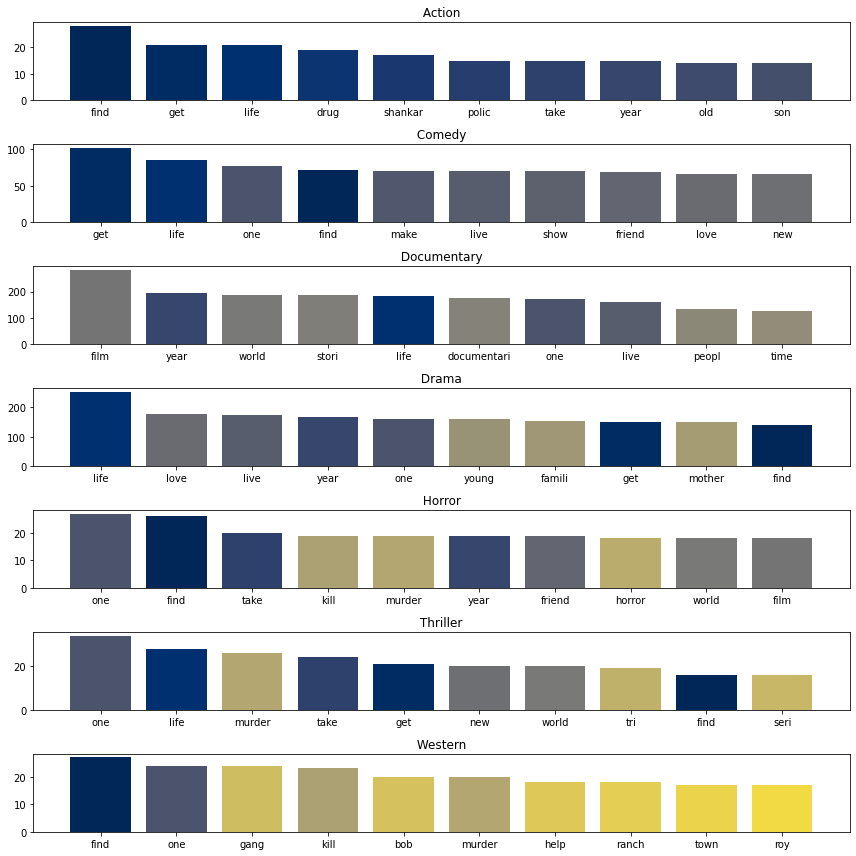

In [9]:
# Run this cell without changes
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure and axes
fig, axes = plt.subplots(nrows=7, figsize=(12, 12))

# Empty dict to hold words that have already been plotted and their colors
plotted_words_and_colors = {}
# Establish color palette to pull from
# (If you get an error message about popping from an empty list, increase this #)
color_palette = sns.color_palette('cividis', n_colors=38)

# Creating a plot for each unique genre
data_by_genre = [y for _, y in data.groupby('genre', as_index=False)]
for idx, genre_df in enumerate(data_by_genre):
    # Find top 10 words in this genre
    all_words_in_genre = genre_df.preprocessed_text.explode()
    top_10 = all_words_in_genre.value_counts()[:10]
    
    # Select appropriate colors, reusing colors if words repeat
    colors = []
    for word in top_10.index:
        if word not in plotted_words_and_colors:
            new_color = color_palette.pop(0)
            plotted_words_and_colors[word] = new_color
        colors.append(plotted_words_and_colors[word])
    
    # Select axes, plot data, set title
    ax = axes[idx]
    ax.bar(top_10.index, top_10.values, color=colors)
    ax.set_title(genre_df.iloc[0].genre.title())
    
fig.tight_layout()

## 3) Fit a Count Vectorizer

Now that we have explored the data some, let's prepare it for modeling.

Before we fit a vectorizer to the data, we need to convert the list of tokens for each document back to a string datatype and create a train test split.

In [10]:
# Run this cell without changes
from sklearn.model_selection import train_test_split

# Convert token lists to strings
data["joined_preprocessed_text"] = data["preprocessed_text"].str.join(" ")

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(
    data["joined_preprocessed_text"], data.genre, test_size=0.3, random_state=2021)

X_train

3806    young man aunt refus give inherit marri pass w...
3202    21st centuri seem one inexhaust wealth great c...
1886                                detail plot kept wrap
2674    walk dark live struggl refuge live krisan refu...
4176    dean randi best friend yearn part someth bigge...
                              ...                        
3618    limpan alcohol put caretak home alcohol promis...
1412    escap ugli life alcohol mother uneduc barman s...
3413    discourag card life felt hank jim belushi man ...
3269    disown clair featur length independ comedi cla...
3734    stori depict problem bulli intimid junior stud...
Name: joined_preprocessed_text, Length: 1050, dtype: object

**In the cell below, create a CountVectorizer instance ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)) with default arguments, called `vectorizer`, and fit it to the training data.**

In [11]:
# CodeGrade step3
# Import the CountVectorizer object from sklearn

from sklearn.feature_extraction.text import CountVectorizer

# Create a `vectorizer` instance
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data
vectorizer.fit(X_train)

CountVectorizer()

In [12]:
assert vectorizer

## 4) Vectorize the Data

In the cell below, vectorize (transform) the training and test datasets using the fitted count vectorizer.

In [15]:
# CodeGrade step4
# Replace None with appropriate code

X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [16]:
from scipy.sparse.csr import csr_matrix
assert type(X_train_vectorized) == csr_matrix
assert type(X_test_vectorized) == csr_matrix

## 5) Fit a Decision Tree Model

In the cell below, 

- Create an instance of `sklearn`'s `DecisionTreeClassifier` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)), using default arguments, with the variable name `dt`
- Fit the model to the vectorized training data

In [18]:
# CodeGrade step5
# Replace None with appropriate code

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize `dt`
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [19]:
assert dt

The following code will now evaluate our model on the test data:

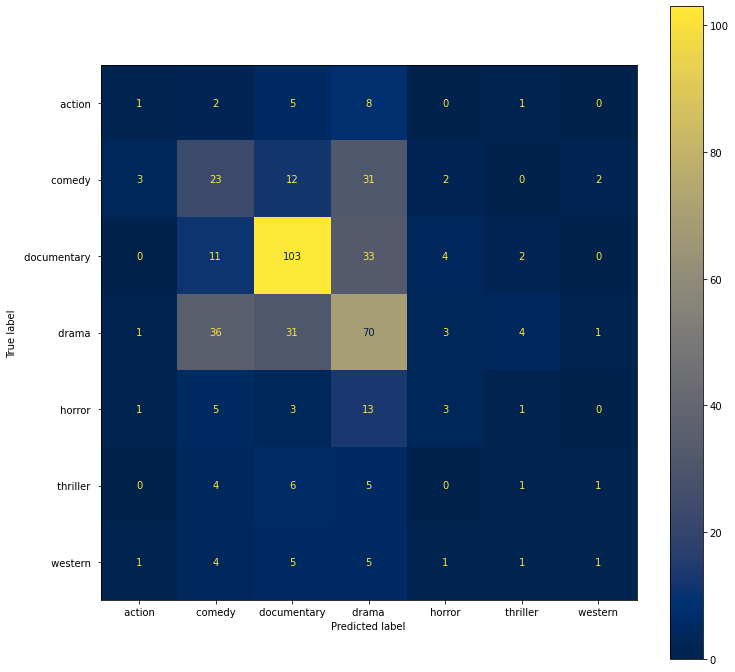

In [20]:
# Run this cell without changes

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(dt, X_test_vectorized, y_test, ax=ax, cmap="cividis");